# Building the model (multikernal SVM)

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import nbimporter
import performance_measure

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from target_parser.ipynb
Importing Jupyter notebook from pandas_to_latex.ipynb
Importing Jupyter notebook from multiscorer.ipynb


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mortenolsenosvik/anaconda3/lib/python3.7/s

In [2]:
def train_svm_model_balanced(X_train,y_train, X_test): 
    
    svm = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')#, probability=True)

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    
    
    #y_train_pred = svm.predict_proba(X_train)
    #y_test_pred = svm.predict_proba(X_test)
    
    #y_train_pred = np.argmax(y_train_pred, axis=1)
    #y_test_pred = np.argmax(y_test_pred, axis=1)

    return svm, y_train_pred, y_test_pred

In [3]:
def train_svm_model_balanced_with_prob(X_train,y_train, X_test): 
    
    svm = SVC(kernel='poly', gamma='auto', random_state=12, probability=True)

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    #y_train_pred = svm.predict(X_train)
    #y_test_pred = svm.predict(X_test)
    
    
    y_train_pred = svm.predict_proba(X_train)
    y_test_pred = svm.predict_proba(X_test)
    
    y_train_pred = np.argmax(y_train_pred, axis=1)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    return svm, y_train_pred, y_test_pred

In [4]:
def train_svm_model(X_train,y_train, X_test):
    
    svm = SVC(kernel='poly', gamma='auto', random_state=12, probability=True)

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    y_train_pred = svm.predict_proba(X_train)
    y_test_pred = svm.predict_proba(X_test)
    
    y_train_pred = np.argmax(y_train_pred, axis=1)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    return svm, y_train_pred, y_test_pred

In [5]:
def get_svm_model_balanced(X_train, X_test, y_train, y_test,convertCode=False, convertStatus=False, name=''):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model_balanced(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True,  name=name,
                                              convertCode=convertCode, convertStatus=convertStatus)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test,  y_test_pred,
                                                convertCode=convertCode, convertStatus=convertStatus)
    return svm
    

In [6]:
def get_svm_model_balanced_with_prob(X_train, X_test, y_train, y_test,convertCode=False,convertStatus=False, name=''):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model_balanced_with_prob(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True, name=name,
                                             convertCode=convertCode, convertStatus=convertStatus)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred,
                                                convertCode=convertCode, convertStatus=convertStatus)
    return svm
    

In [7]:
def get_svm_model(X_train, X_test, y_train, y_test,convertCode=False,convertStatus=False, name=''):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True, name=name,
                                             convertCode=convertCode, convertStatus=convertStatus)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred,
                                                convertCode=convertCode, convertStatus=convertStatus)
    return svm

### Testing with toy dataset from sklearn

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.94736842 0.05263158 0.        ]
 [0.04347826 0.95652174 0.        ]
 [0.         0.05882353 0.94117647]]


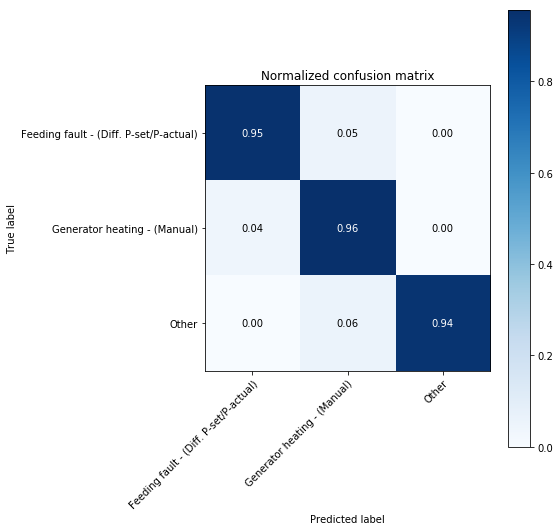

Plotting Performance Measure...
Total Accuracy 		0.949

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.947 		 0.947 		 0.947
Generator heating - (Manual)                     0.917 		 0.957 		 0.936
Other                                            1.000 		 0.941 		 0.970


In [8]:
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

svm = get_svm_model(X_train, X_test, y_train, y_test,convertCode=True,name='lalala')

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.94117647 0.05882353 0.        ]
 [0.         0.95652174 0.04347826]
 [0.         0.05263158 0.94736842]]


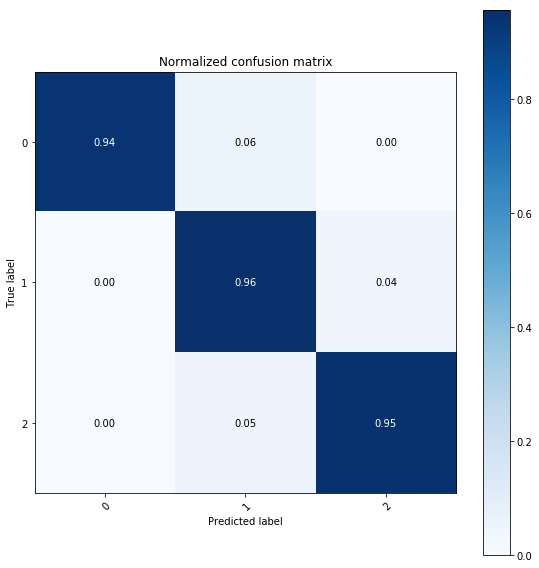

Plotting Performance Measure...
Total Accuracy 		0.949

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
0                                                1.000 		 0.941 		 0.970
1                                                0.917 		 0.957 		 0.936
2                                                0.947 		 0.947 		 0.947


In [9]:
svm = get_svm_model_balanced_with_prob(X_train, X_test, y_train, y_test)

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.95652174 0.04347826]
 [0.         0.05263158 0.94736842]]


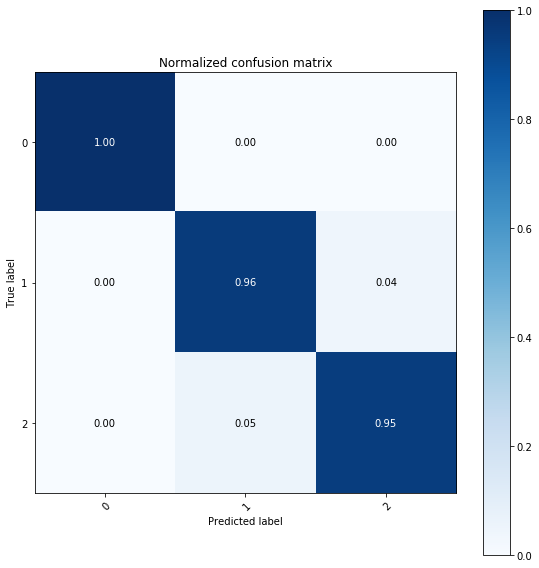

Plotting Performance Measure...
Total Accuracy 		0.966

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
0                                                1.000 		 1.000 		 1.000
1                                                0.957 		 0.957 		 0.957
2                                                0.947 		 0.947 		 0.947


In [11]:
svm =get_svm_model_balanced(X_train, X_test, y_train, y_test)